In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

# 3D CSR Potentials

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
#sigma_z = 40e-6
#sigma_x = 134e-6 
#rho = 1538.
#gamma = 58708.

sigma_z = 10e-6
sigma_x = 10e-6 
rho = 1.
gamma = 500.


beta = np.sqrt(1 - 1 / gamma ** 2)
beta2 = 1-1/gamma**2


# alpha

For convenience we will use the notatation

$\xi \rightarrow z$

$\chi \rightarrow x$

$\zeta \rightarrow y$

Then 

$z = \alpha - \frac{\beta}{2}\sqrt{x^2+y^2+4(1+x)\sin^2\alpha}$

In [5]:
from csr3d.core import alpha_exact, alpha, alpha_where_z_equals_zero

In [6]:
xmax = 1/gamma**2
xmin = -xmax
xptp = xmax-xmin

ymax = 1/gamma**2
ymin = -ymax
yptp = ymax-ymin

zmax = 1/gamma**2
zmin = -zmax
zptp = zmax-zmin

nx = 64
ny = 32
nz = 256

dx = xptp/(nx-1)
dy = yptp/(ny-1)
dz = zptp/(nz-1)

xvec = np.linspace(xmin, xmax, nx)
yvec = np.linspace(ymin, ymax, ny)
zvec = np.linspace(zmin, zmax, nz)

X, Y, Z = np.meshgrid( xvec, yvec, zvec, indexing='ij')

xmax, ymax, zmax

(4e-06, 4e-06, 4e-06)

In [7]:
A0 = alpha_exact(X, Y, Z, beta)

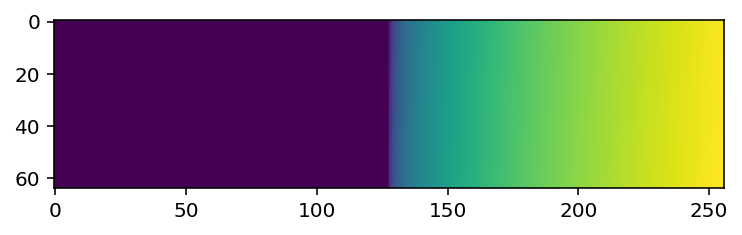

In [8]:
plt.imshow(A0[:,1,:])

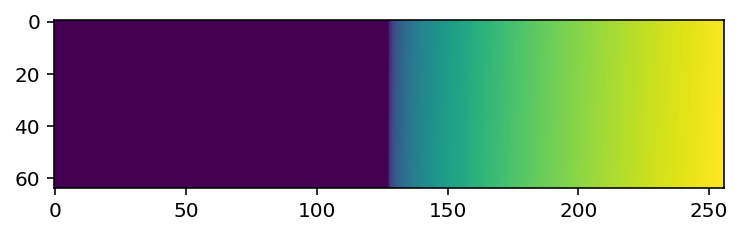

In [9]:
A1 = alpha(X, Y, Z, beta)
plt.imshow(A1[:,1,:])

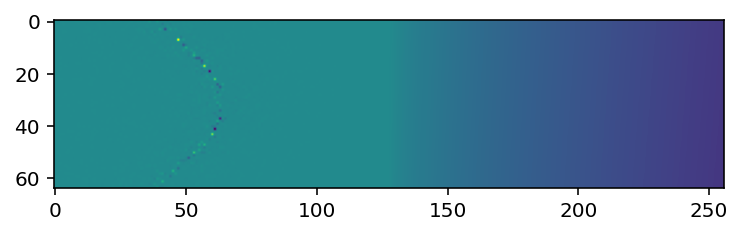

In [10]:
err = (A1-A0)/A0
np.abs(err).max()
plt.imshow(err[:,0,:])

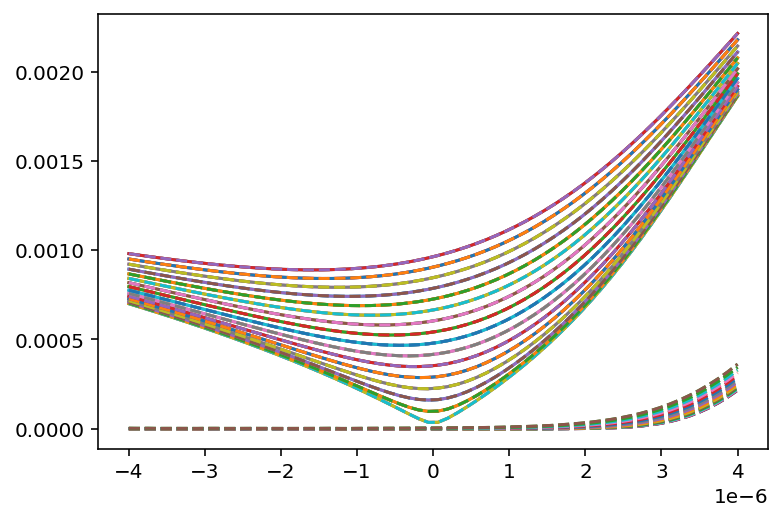

In [11]:
for y0 in yvec:
    a0 =  alpha_exact(xvec, y0, 0, beta2)
    a1 = alpha_where_z_equals_zero(xvec, y0, beta2)
    err = a0-a1
    plt.plot(xvec, a0)
    plt.plot(xvec, a1, linestyle='--')
    plt.plot(xvec, err*1e6, linestyle='--')

# psi_s

In [12]:
from csr3d.core import psi_s

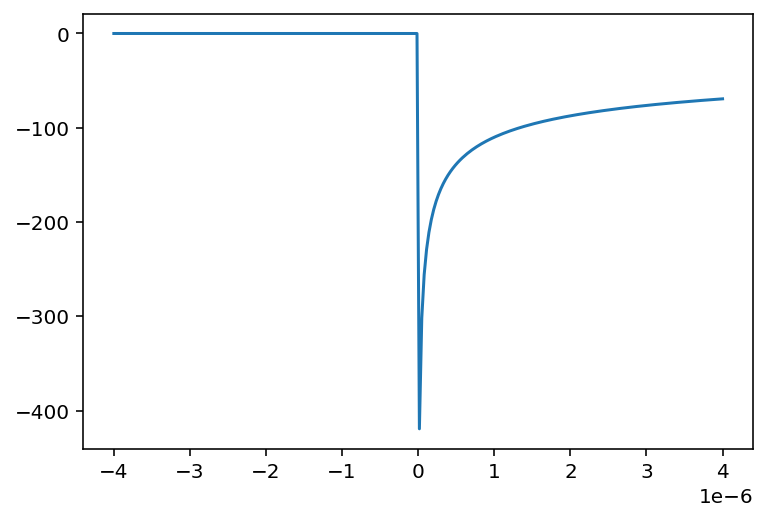

In [13]:
plt.plot(zvec, psi_s(0, 0, zvec, beta))

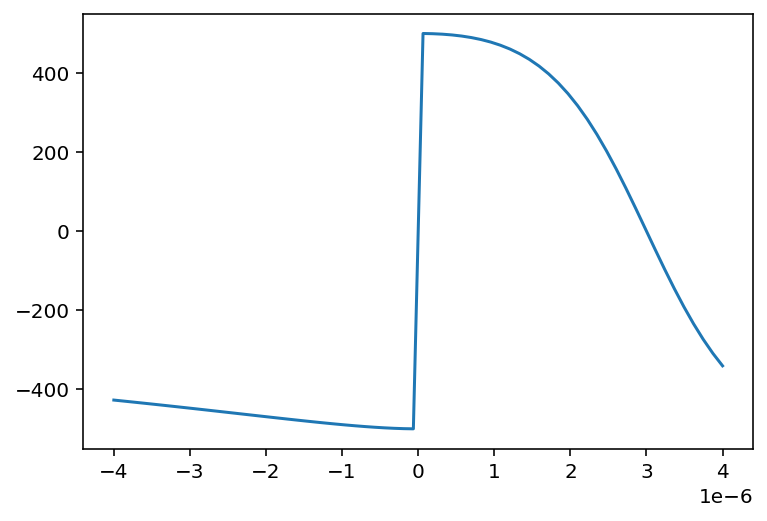

In [14]:
plt.plot(xvec, psi_s(xvec, 0, 0, beta))

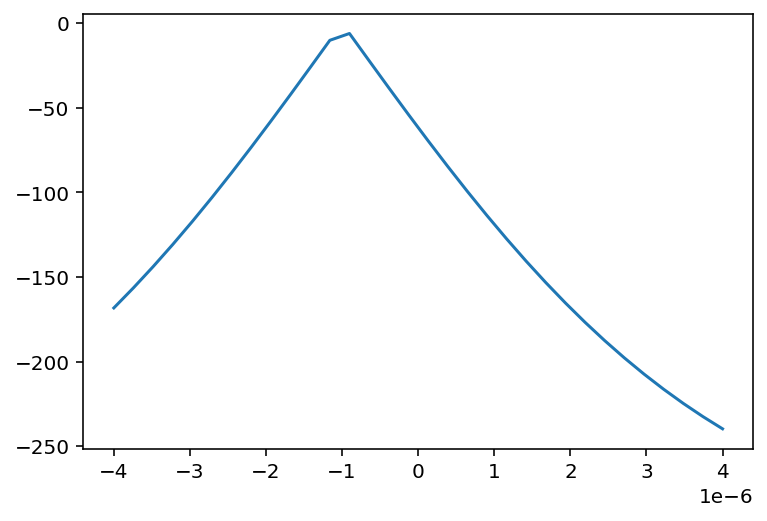

In [15]:
plt.plot(yvec, psi_s(0, yvec+1e-6, 0, beta))

In [16]:
psi_s(0,1e-6,1e-6, beta)

-110.04697293067511

# psi_s mesh

In [17]:
from csr3d.wake import green_meshes

In [18]:
%%time
G = green_meshes((nx, ny, nz), (dx, dy, dz), rho=rho, beta=beta)

CPU times: user 1.07 s, sys: 428 ms, total: 1.5 s
Wall time: 1.51 s


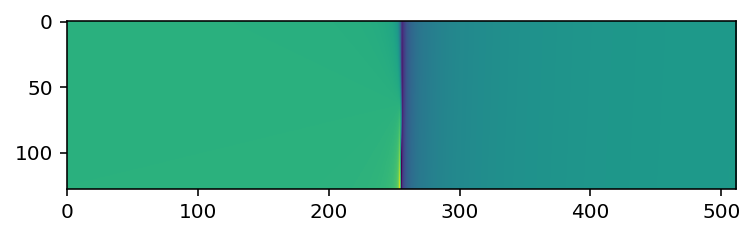

In [19]:
plt.imshow(G[:,16,:])

In [20]:
%%time
Gs = green_meshes((nx, ny, nz), (dx, dy, dz/100), rho=rho, beta=beta)

CPU times: user 1.06 s, sys: 417 ms, total: 1.48 s
Wall time: 1.48 s


Text(0.5, 1.0, '$\\psi_s$')

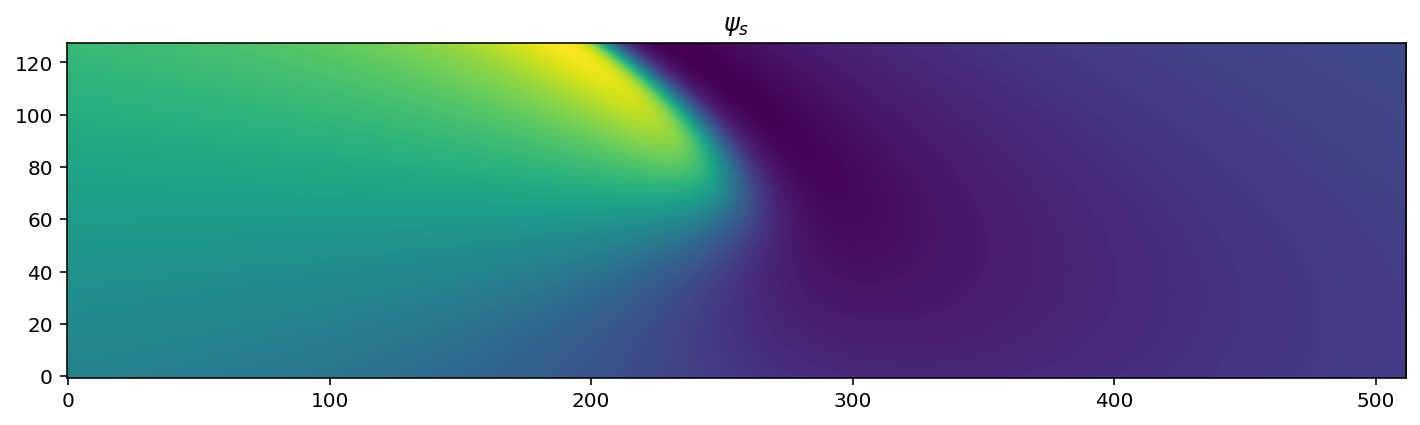

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(Gs[:,ny//2,:], origin='lower', aspect='equal')
ax.set_title(r'$\psi_s$')